In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing

In [11]:
data = fetch_california_housing()

In [12]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [14]:
y = pd.DataFrame(data.target,columns=['Price'])

In [17]:
df = pd.concat([df, y], axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('Price',axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
scaled_X_train.shape

(13828, 8)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(scaled_X_train,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(scaled_X_test)

In [36]:
from sklearn.metrics import r2_score

In [39]:
print(r2_score(y_test,y_pred))

0.5970494128783952


In [38]:
model.intercept_

np.float64(2.0666362048018536)

In [40]:
model.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

In [42]:
residual = y_test - y_pred

<Axes: xlabel='Price', ylabel='Density'>

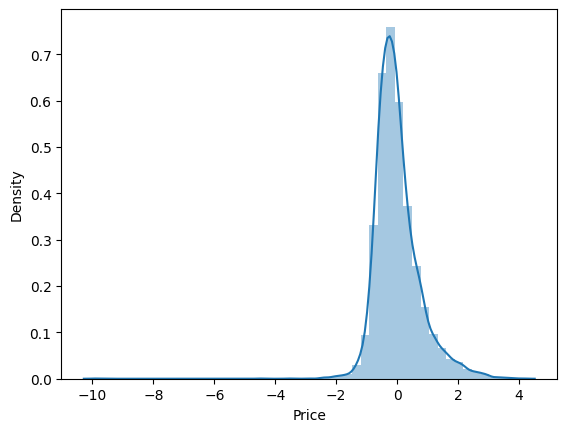

In [48]:
sns.distplot(residual)

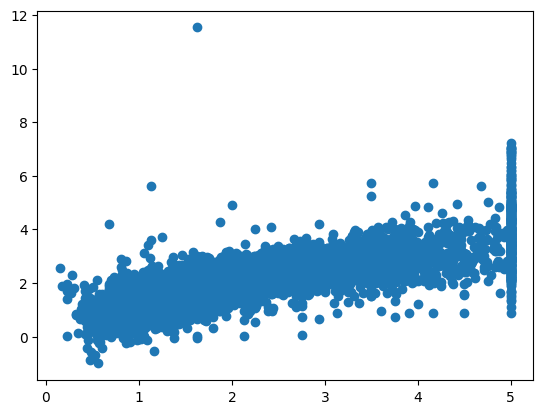

In [49]:
plt.scatter(y_test,y_pred)

In [51]:
from sklearn.linear_model import Lasso, LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV

In [53]:
model2 = LassoCV(cv=5)
model2.fit(scaled_X_train,y_train)
y_pred2 =model2.predict(scaled_X_test)


In [54]:
print(r2_score(y_test,y_pred2))

0.5982576042473224


In [55]:
model3 = RidgeCV(cv=5)
model3.fit(scaled_X_train,y_train)
y_pred3 =model3.predict(scaled_X_test)
print(r2_score(y_test,y_pred3))

0.5970666340985782


In [56]:
model4 = ElasticNetCV(cv=5)
model4.fit(scaled_X_train,y_train)
y_pred4 =model4.predict(scaled_X_test)
print(r2_score(y_test,y_pred4))

0.5979006838988992
